## Intro
Really world problems usually involve complex anlysis on big data. In this lab, we will introduce some useful functions to help complex data analysis.

In [3]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import glob # a library to handle path/folder/file related issues
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar

#### import data

In [4]:
u_file='/mnt/data/MetService_WRF/U_20000101000000.nc'
v_file='/mnt/data/MetService_WRF/V_20000101000000.nc'
t_file = '/mnt/data/MetService_WRF/T_20000101000000.nc'
smois_file = '/mnt/data/MetService_WRF/SMOIS_20000101000000.nc'

In [5]:
chunks={"height":1,"time":100}

In [6]:
ds_u = xr.open_dataset(u_file,chunks=chunks)
ds_v = xr.open_dataset(v_file,chunks=chunks)
ds_t = xr.open_dataset(t_file,chunks=chunks)
ds_s = xr.open_dataset(smois_file,chunks=chunks)

In [ ]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import glob # a library to handle path/folder/file related issues
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar

u_file='/mnt/data/MetService_WRF/U_20000101000000.nc'
v_file='/mnt/data/MetService_WRF/V_20000101000000.nc'
t_file = '/mnt/data/MetService_WRF/T_20000101000000.nc'
smois_file = '/mnt/data/MetService_WRF/SMOIS_20000101000000.nc'

chunks={"height":1,"time":100}

ds_u = xr.open_dataset(u_file,chunks=chunks)
ds_v = xr.open_dataset(v_file,chunks=chunks)
ds_t = xr.open_dataset(t_file,chunks=chunks)
ds_s = xr.open_dataset(smois_file,chunks=chunks)

### masking

masking is a powerful tool, consider it as a if-else but for a multi dimensional data.

Two ways of using the mask function, either ds.where/da.where or xr.where. You can apply mask on either the whole dataset or on a single dataarray. xr.where gives you more flexibility of assigning values to both true and false conditions

Let's first use soil moisture to remove water from the figure/data.

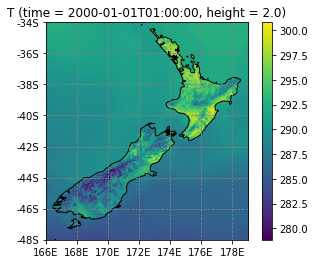

In [7]:
ds_t.T[0,1,...].salem.quick_map()

In [8]:
#ds_s.SMOIS[:,:,...].salem.quick_map(cmap="jet") # go to start and find what he changed this to, its fucked and just breaks tho

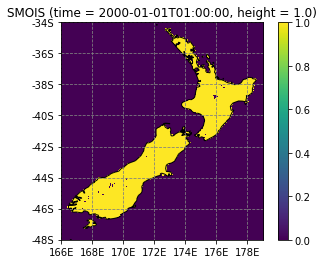

In [9]:
(ds_s.SMOIS[0,1,...]<0.9).salem.quick_map()

In [10]:
(ds_s.SMOIS[0,1,...]<0.8).values # shows values??? hes rambling, he says use .compute not .values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [11]:
(ds_s.SMOIS[0,1,...]<0.8).compute() # gets values but retains xarray structure

<xarray.DataArray 'SMOIS' (lat: 508, lon: 472)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    time     datetime64[ns] 2000-01-01T01:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 1.0

In [12]:
cond_mask=(ds_s.SMOIS[0,1,...]<0.8).compute() # 9:35 no idea wtf the point of this was, this is a 2d ary mask he says

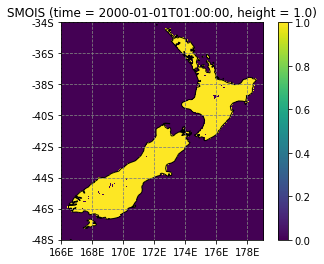

In [13]:
cond_mask.salem.quick_map()

In [14]:
np.where?

Docstring:
where(condition, [x, y])

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes
-----
If all the arrays are 1-D, `where` is equivalent to::

    [xv if c else yv
     for c, xv, yv in zip(condition, x, y)]

Examples
-

In [15]:
mask=(ds_s.SMOIS[0,1,...]<0.9)

In [16]:
mask.values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [17]:
ds_t.T.where(mask) # passed contion of a t/f matrix

<xarray.DataArray 'T' (height: 10, time: 744, lat: 508, lon: 472)>
dask.array<where, shape=(10, 744, 508, 472), dtype=float32, chunksize=(1, 100, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

In [18]:
ds_t_lad=ds_t.where(mask)

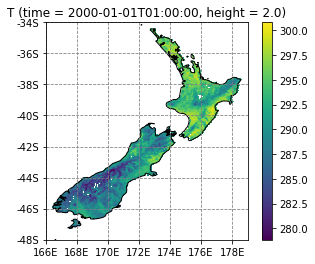

In [19]:
ds_t_lad.T[0,1,...].salem.quick_map()   #default behavior is use nan for masked values/positions.   Note sea and lakes missing coz water is for chumps

Now let's only look at the wind speed distribuation at the locations where they have top 30% quantile of the monthly mean temperature

In [20]:
def calculate_ws_wd(u,v):
    wspeed = xr.ufuncs.sqrt(u*u + v * v)
    wdir   = (270-xr.ufuncs.arctan2(v,u)* 180/ np.pi)%360
    wspeed.name = "wind speed"
    wdir.name = "wind dir"
    wspeed.attrs["units"] = "m/s"
    return wspeed, wdir

In [21]:
wspeed,wdir = calculate_ws_wd(ds_u.U,ds_v.V)

/tmp/ipykernel_4125240/2959412116.py:2: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wspeed = xr.ufuncs.sqrt(u*u + v * v)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_4125240/2959412116.py:3: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wdir   = (270-xr.ufuncs.arctan2(v,u)* 180/ np.pi)%360
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3088: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self.variable, other_variable)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/variable.py:2420: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self_data, other_data) if not reflexive else f(other_data, self_data

In [22]:
wspeed

<xarray.DataArray 'wind speed' (height: 10, time: 744, lat: 508, lon: 472)>
dask.array<sqrt, shape=(10, 744, 508, 472), dtype=float32, chunksize=(1, 100, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Attributes:
    units:    m/s

/tmp/ipykernel_4125240/2959412116.py:2: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wspeed = xr.ufuncs.sqrt(u*u + v * v)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_4125240/2959412116.py:3: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wdir   = (270-xr.ufuncs.arctan2(v,u)* 180/ np.pi)%360
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3088: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self.variable, other_variable)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/variable.py:2420: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self_data, other_data) if not reflexive else f(other_data, self_data

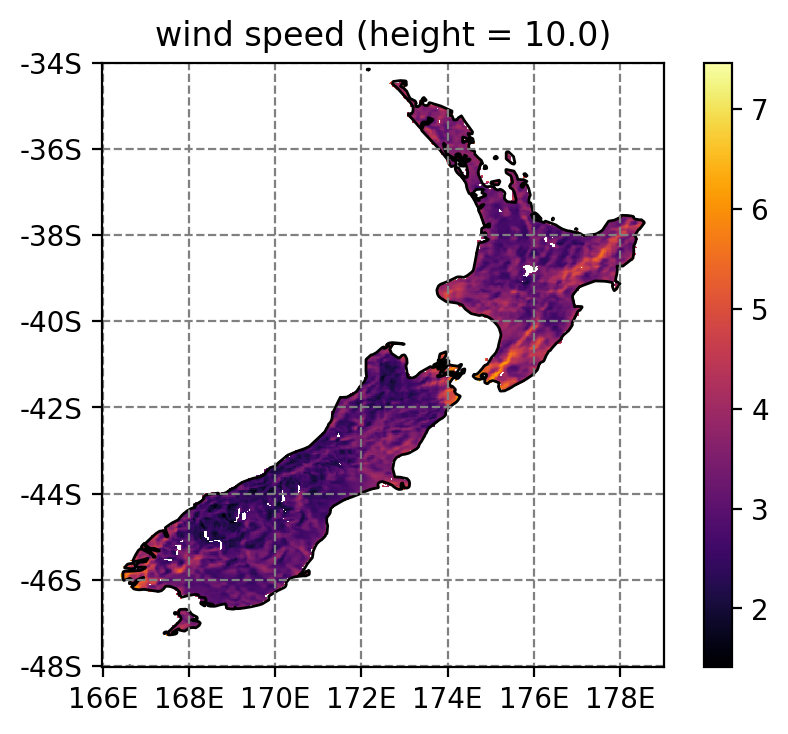

In [23]:
# one i made for wind speed, welly is the windy

windyboi, _ = calculate_ws_wd(ds_u.U,ds_v.V)

plt.figure(dpi=200)
land_mask=(ds_s.SMOIS[0,1,...]<0.8).compute()
land_only=windyboi.where(land_mask)
land_only_avg_wind=land_only.isel(height=0).mean(dim="time")
land_only_avg_wind.salem.quick_map(cmap="inferno")

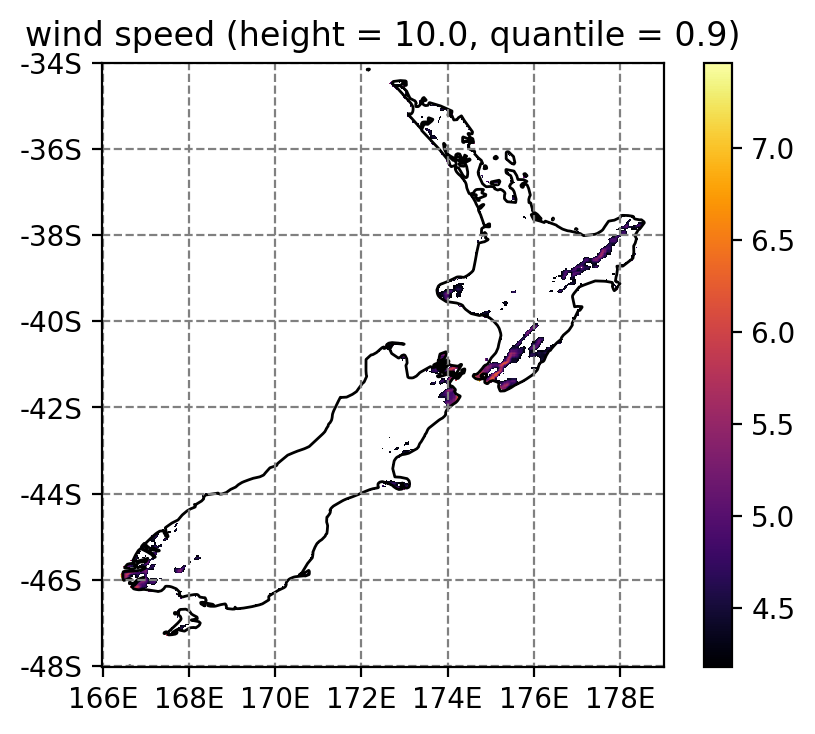

In [24]:
# one i made for wind speed, welly is the windy
plt.figure(dpi=200)
land_mask=(ds_s.SMOIS[0,1,...]<0.8).compute()
land_only=wspeed.where(land_mask)
land_only_avg_wind=land_only.isel(height=0).mean(dim="time")
land_only_avg_wind.where(land_only_avg_wind>land_only_avg_wind.quantile(0.9)).salem.quick_map(cmap="inferno")

/tmp/ipykernel_4125240/2959412116.py:2: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wspeed = xr.ufuncs.sqrt(u*u + v * v)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_4125240/2959412116.py:3: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wdir   = (270-xr.ufuncs.arctan2(v,u)* 180/ np.pi)%360
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3088: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self.variable, other_variable)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/variable.py:2420: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self_data, other_data) if not reflexive else f(other_data, self_data

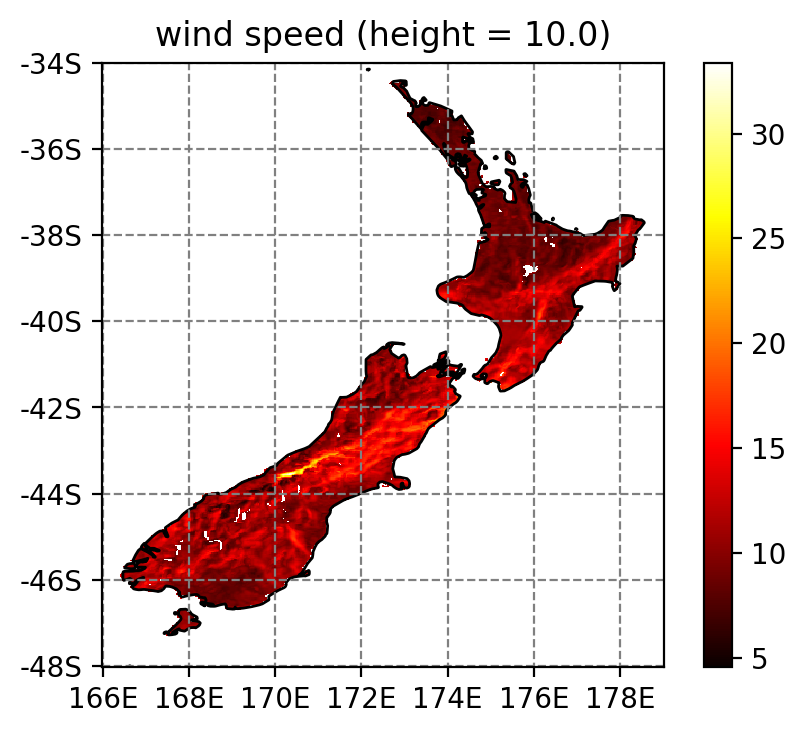

In [25]:
# one i made for max ind speed

windyboi, _ = calculate_ws_wd(ds_u.U,ds_v.V)

plt.figure(dpi=200)
land_mask=(ds_s.SMOIS[0,1,...]<0.8).compute()
land_only=windyboi.where(land_mask)
land_only_max_wind=land_only.isel(height=0).max(dim="time")
land_only_max_wind.salem.quick_map(cmap="hot")

/tmp/ipykernel_4125240/2959412116.py:2: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wspeed = xr.ufuncs.sqrt(u*u + v * v)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_4125240/2959412116.py:3: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wdir   = (270-xr.ufuncs.arctan2(v,u)* 180/ np.pi)%360
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3088: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self.variable, other_variable)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/variable.py:2420: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self_data, other_data) if not reflexive else f(other_data, self_data

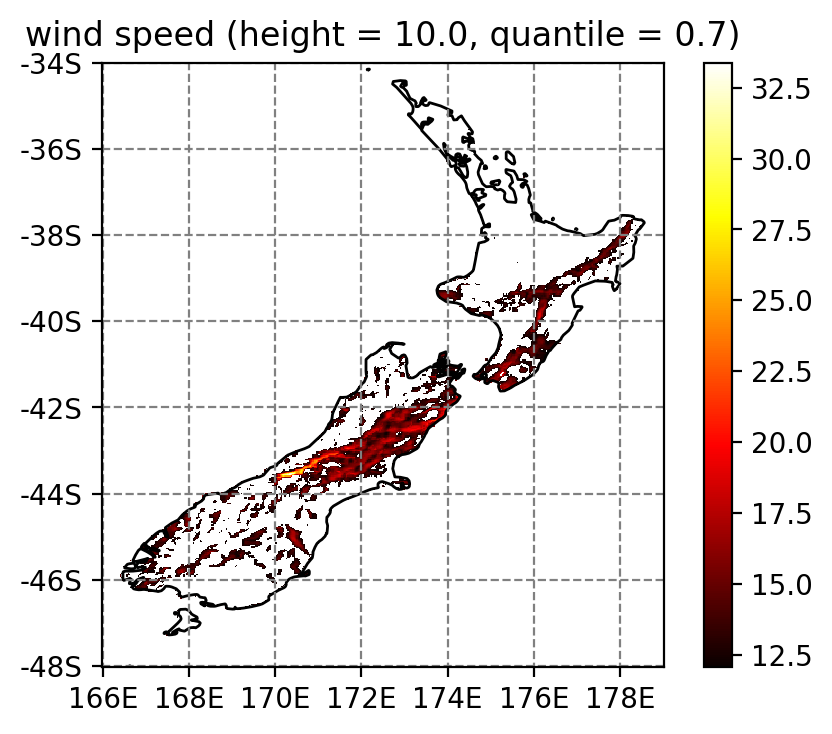

In [26]:
# one i made for max ind speed

windyboi, _ = calculate_ws_wd(ds_u.U,ds_v.V)

plt.figure(dpi=200)
land_mask=(ds_s.SMOIS[0,1,...]<0.8).compute()
land_only=windyboi.where(land_mask)
land_only_max_wind=land_only.isel(height=0).max(dim="time")
land_only_max_wind.where(land_only_max_wind>land_only_max_wind.quantile(0.7)).salem.quick_map(cmap="hot")

/tmp/ipykernel_4125240/2959412116.py:2: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wspeed = xr.ufuncs.sqrt(u*u + v * v)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3068: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  da = self.__array_wrap__(f(self.variable.data, *args, **kwargs))
/tmp/ipykernel_4125240/2959412116.py:3: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  wdir   = (270-xr.ufuncs.arctan2(v,u)* 180/ np.pi)%360
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/dataarray.py:3088: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self.variable, other_variable)
/opt/conda/envs/baseline/lib/python3.8/site-packages/xarray/core/variable.py:2420: FutureWarning: xarray.ufuncs is deprecated. Instead, use numpy ufuncs directly.
  f(self_data, other_data) if not reflexive else f(other_data, self_data

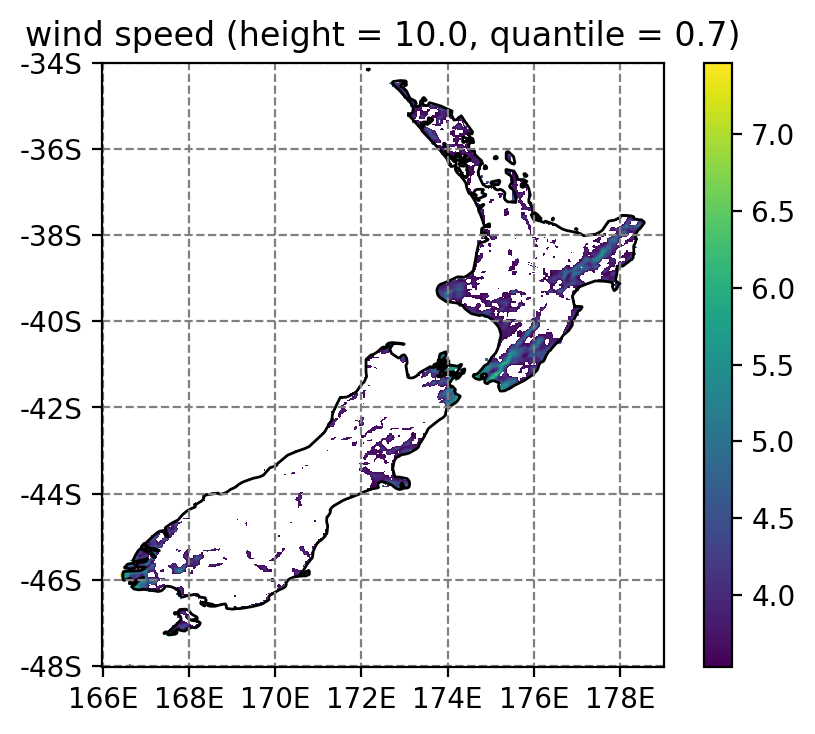

In [27]:
# HOW HE DID IT
plt.figure(dpi=200)
windspeed, _ = calculate_ws_wd(ds_u.U,ds_v.V)
land_mask=(ds_s.SMOIS[0,1,...]<0.8).compute()
wspeed_land=windspeed.where(land_mask)

fml = wspeed_land.isel(height=0).mean(dim='time')
fml.where(fml>fml.quantile(0.7)).salem.quick_map()

In [28]:
#xr.where(fml>fml.quantile(0.7),np.nan).salem.quick_map() #???? missed this bit

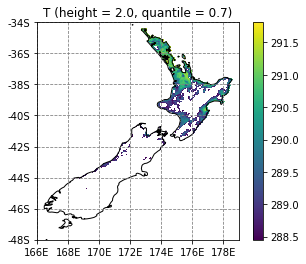

In [29]:
### ds_t["T"].isel(height=0).mean(dim="time").where(ds_t["T"].isel(height=0).mean(dim="time")>ds_t["T"].isel(height=0).mean(dim="time").quantile(0.7)).plot()
ds_t_lad_surf_mean = ds_t_lad["T"].isel(height=0).mean(dim="time")
ds_t_lad_surf_mean.where(ds_t_lad_surf_mean>ds_t_lad_surf_mean.quantile(0.7)).salem.quick_map()

In [30]:
high_temperature_mask = xr.where(ds_t_lad_surf_mean>ds_t_lad_surf_mean.quantile(0.7),True,False)

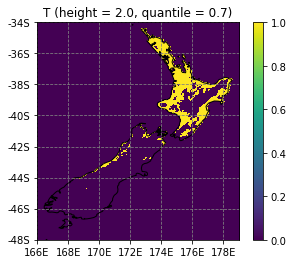

In [31]:
high_temperature_mask.salem.quick_map()

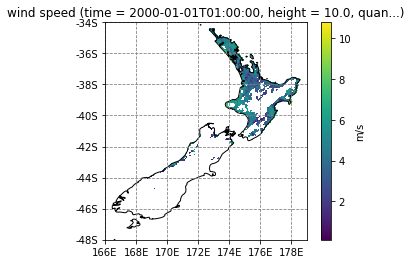

In [32]:
wspeed.where(high_temperature_mask)[0,1,].salem.quick_map()

### resample

Resampling is another technique that commonly used in data anlysis. For example, if you have a station that observes air pollution hourly, you need to use resample to get daily/monthly/yearly pollution information.

ds_t_lad.resample(time="1D").mean()Get daily average, max and min temperature

In [33]:
ds_t_lad.resample(time="1D")

DatasetResample, grouped over '__resample_dim__'
31 groups with labels 2000-01-01, ..., 2000-01-31.

In [34]:
ds_t_lad.resample(time="1H")

DatasetResample, grouped over '__resample_dim__'
744 groups with labels 2000-01-01, ..., 2000-01-31T2....

In [35]:
ds_t_lad.resample(time="1M")

DatasetResample, grouped over '__resample_dim__'
1 groups with labels 2000-01-31.

In [36]:
ds_t_lad.resample(time="10S").interpolate() # fudges smaller size, you can input diff functs as well. but its synthetic data

<xarray.Dataset>
Dimensions:  (height: 10, time: 267481, lat: 508, lon: 472)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
Data variables:
    T        (height, time, lat, lon) float32 dask.array<chunksize=(1, 267481, 508, 472), meta=np.ndarray>

In [37]:
ds_t_lad.resample(time="1D").mean()

,Array,Chunk
Bytes,283.55 MiB,0.91 MiB
Shape,"(31, 10, 508, 472)","(1, 1, 508, 472)"
Count,1898 Tasks,310 Chunks
Type,float32,numpy.ndarray


In [38]:
ds_t_lad.resample(time="1H").mean()  #notice the time dimensions size between this and 1D above  31 vs 744

,Array,Chunk
Bytes,6.65 GiB,0.91 MiB
Shape,"(744, 10, 508, 472)","(1, 1, 508, 472)"
Count,37428 Tasks,7440 Chunks
Type,float32,numpy.ndarray


In [39]:
#ds_t_lad.resample(time="1D").mean("time") # works but the time in mean is redundant
#ds_t_lad.resample(time="1D").mean("anthing else") # explodes cant do time and heigth or time and something else

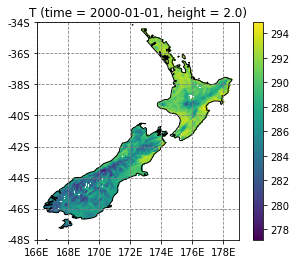

In [40]:
ds_t_lad.resample(time="1D").mean(dim="time").T[0,0].salem.quick_map() #You can change mean to max/min and other functions or even write your own function and use .reduce(func)

In [41]:
ds_t_lad.resample(time="10S").interpolate()

<xarray.Dataset>
Dimensions:  (height: 10, time: 267481, lat: 508, lon: 472)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
Data variables:
    T        (height, time, lat, lon) float32 dask.array<chunksize=(1, 267481, 508, 472), meta=np.ndarray>

In [42]:
ds_t.mean(dim='time') # loses time dim

<xarray.Dataset>
Dimensions:  (lat: 508, lon: 472, height: 10)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Data variables:
    T        (height, lat, lon) float32 dask.array<chunksize=(1, 508, 472), meta=np.ndarray>

In [43]:
ds_t.resample(time="1M").mean(dim='time') #retains time dim

<xarray.Dataset>
Dimensions:  (time: 1, lat: 508, lon: 472, height: 10)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-31
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Data variables:
    T        (time, height, lat, lon) float32 dask.array<chunksize=(1, 1, 508, 472), meta=np.ndarray>

ds_t_lad.groupby### Groupby
groupby function is another useful tool which gives you more flexibility to group/subsample data.

In [44]:
ds_t_lad.groupby?

Signature:
ds_t_lad.groupby(
    group,
    squeeze: 'bool' = True,
    restore_coord_dims: 'bool' = None,
)
Docstring:
Returns a GroupBy object for performing grouped operations.

Parameters
----------
group : str, DataArray or IndexVariable
    Array whose unique values should be used to group this array. If a
    string, must be the name of a variable contained in this dataset.
squeeze : bool, optional
    If "group" is a dimension of any arrays in this dataset, `squeeze`
    controls whether the subarrays have a dimension of length 1 along
    that dimension or if the dimension is squeezed out.
restore_coord_dims : bool, optional
    If True, also restore the dimension order of multi-dimensional
    coordinates.

Returns
-------
grouped
    A `GroupBy` object patterned after `pandas.GroupBy` that can be
    iterated over in the form of `(unique_value, grouped_array)` pairs.

Examples
--------
Calculate daily anomalies for daily data:

>>> da = xr.DataArray(
...     np.linspace(0, 1

In [45]:
ds_t_lad.groupby(ds_t.time.dt.day)

DatasetGroupBy, grouped over 'day'
31 groups with labels 1, 2, 3, 4, 5, 6, ..., 27, 28, 29, 30, 31.

In [46]:
ds_t.time.dt.day

<xarray.DataArray 'day' (time: 744)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
...
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00

In [47]:
ds_t_lad.groupby(ds_t.time.dt.dayofweek)

DatasetGroupBy, grouped over 'dayofweek'
7 groups with labels 0, 1, 2, 3, 4, 5, 6.

In [48]:
ds_t.time.dt.dayofweek

<xarray.DataArray 'dayofweek' (time: 744)>
array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00

In [49]:
ds_t_lad.groupby(ds_t.time.dt.dayofweek).mean() # find if fridays are rainy or some shit, kinda meaningless but fun

<xarray.Dataset>
Dimensions:    (dayofweek: 7, height: 10, lat: 508, lon: 472)
Coordinates:
  * lat        (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon        (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height     (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
  * dayofweek  (dayofweek) int64 0 1 2 3 4 5 6
Data variables:
    T          (dayofweek, height, lat, lon) float32 dask.array<chunksize=(1, 1, 508, 472), meta=np.ndarray>

In [50]:
ds_t_lad.groupby("time.day").mean(dim="time")

,Array,Chunk
Bytes,283.55 MiB,0.91 MiB
Shape,"(31, 10, 508, 472)","(1, 1, 508, 472)"
Count,1898 Tasks,310 Chunks
Type,float32,numpy.ndarray


In [51]:
ds_t_lad.groupby(ds_t.time.dt.hour)

DatasetGroupBy, grouped over 'hour'
24 groups with labels 0, 1, 2, 3, 4, 5, ..., 19, 20, 21, 22, 23.

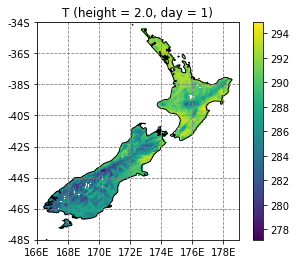

In [52]:
ds_t_lad.groupby("time.day").mean(dim="time").T[0,0].salem.quick_map() # Same as the resample example, you can also use ds_t_lad.time.dt.day inside groupby

In [53]:
ds_t_lad.groupby("time.hour").mean(dim="time") #Hourly composit

,Array,Chunk
Bytes,219.52 MiB,0.91 MiB
Shape,"(24, 10, 508, 472)","(1, 1, 508, 472)"
Count,5268 Tasks,240 Chunks
Type,float32,numpy.ndarray


In [54]:
ds_t_lad.groupby(ds_t_lad.time.dt.hour).mean(dim="time")  ##groupby basically takes a categorical data and group the original data based on the input categorical data. 

,Array,Chunk
Bytes,219.52 MiB,0.91 MiB
Shape,"(24, 10, 508, 472)","(1, 1, 508, 472)"
Count,5268 Tasks,240 Chunks
Type,float32,numpy.ndarray


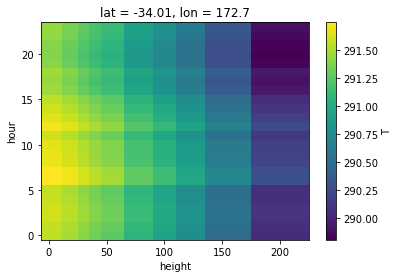

In [55]:
ds_t_hourly=ds_t.groupby(ds_t.time.dt.hour).mean(dim="time")
ds_t_hourly.T.sel(lat=43.525,lon=172.639,method="nearest").plot()   #heat by hour and dist from ground. My graphs diff than his 11:40-11:50ish

In [56]:

#ds_t_lad.T.groupby(high_temperature_mask).mean(dim=["height",'stacked_lat_lon']).values # this line calculates the average temperature of the hight/low category based on high_temperature_mask

### Other functions

In [57]:
ds_t_lad.coarsen(lat=10,lon=10,boundary="trim").max()   #chooses one lat and long in each of the brackets, so this is one sample in 10 by 10. lowering resoloution. This grabs max

<xarray.Dataset>
Dimensions:  (height: 10, time: 744, lat: 50, lon: 47)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
  * lat      (lat) float64 -47.88 -47.6 -47.32 -47.05 ... -34.9 -34.63 -34.35
  * lon      (lon) float64 166.1 166.4 166.7 167.0 ... 178.0 178.3 178.5 178.8
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Data variables:
    T        (height, time, lat, lon) float32 dask.array<chunksize=(1, 100, 50, 47), meta=np.ndarray>

In [59]:
ds_t_lad.coarsen(lat=10,lon=10,boundary="trim").mean() #this one is the avg

<xarray.Dataset>
Dimensions:  (height: 10, time: 744, lat: 50, lon: 47)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
  * lat      (lat) float64 -47.88 -47.6 -47.32 -47.05 ... -34.9 -34.63 -34.35
  * lon      (lon) float64 166.1 166.4 166.7 167.0 ... 178.0 178.3 178.5 178.8
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Data variables:
    T        (height, time, lat, lon) float32 dask.array<chunksize=(1, 100, 50, 47), meta=np.ndarray>

In [58]:
ds_t_lad.rolling(time=24).mean()

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472, height: 10)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 2.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Data variables:
    T        (height, time, lat, lon) float64 dask.array<chunksize=(1, 123, 508, 472), meta=np.ndarray>

#### task

Calculate hourly composite average of wind speed, direction, temperature.

In [ ]:
ds_t.T.rolling(time=24).mean().isel(height=0).sel(lat=43.525,lon=172.639,method="nearest").plot() #sh